In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import wave
import sys
%matplotlib inline

In [2]:
rate, data = wav.read('Recording.wav')

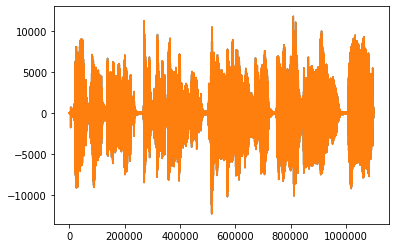

In [3]:
plt.plot(data)

In [4]:
data

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [-15, -15],
       [-15, -15],
       [-13, -13]], dtype=int16)

In [5]:
len(data)

1099776

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


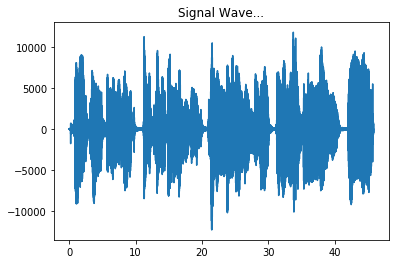

In [6]:
spf = wave.open('Recording.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, 'Int16')

fs = spf.getframerate()
Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)



plt.title('Signal Wave...')
plt.plot(Time,signal)
plt.show()

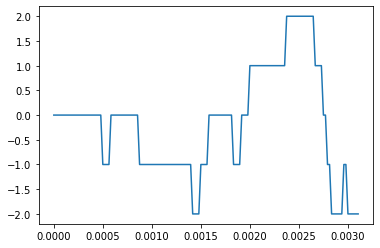

In [7]:
plt.plot(Time[0:150],signal[0:150])

plt.show()

In [8]:
signal

array([  0,   0,   0, ..., -15, -13, -13], dtype=int16)

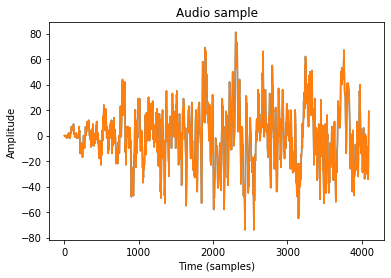

In [9]:
from scipy.io.wavfile import read
input_data = read("Recording.wav")
audio = input_data[1]

plt.plot(audio[0:4096])

plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")
 # set the title
plt.title("Audio sample")
# display the plot
plt.show()

In [10]:
audio[3][0]

0

In [12]:
x_axis = []
y_axis = []
for x, y in audio:
    y_axis.append(y)

In [13]:
x_axis = np.arange(0, len(y_axis))

<BarContainer object of 1024 artists>

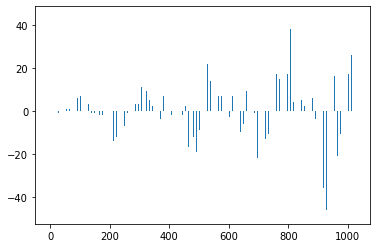

In [14]:
plt.bar(x_axis[0:1024], y_axis[0:1024], bottom=0, width=0.2)

In [15]:
xts = np.arange(0, len(y_axis))

In [16]:
len(xts)

1099776

In [21]:
lowest_val = min(y_axis)

In [32]:
print(lowest_val)

-12326


In [17]:
# xts = np.arange(0, len(y_axis), r).astype('int')
xts = np.arange(0, len(y_axis)).astype('int')

NameError: name 'r' is not defined

<BarContainer object of 1024 artists>

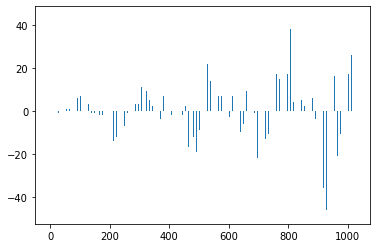

In [26]:
plt.bar(xts[0:1024], y_axis[0:1024],bottom=0, width=0.2)

In [59]:
ys = np.array(y_axis)

In [38]:
ys.min()

-12326

In [54]:
# Normalization of y axis
# Shifting the signla upward by the lowest value in y_axis variable

ys_normalized = ys - lowest_val

In [44]:
print(np.var(ys))
print(np.var(ys_normalized))

4541272.421281813
4541272.421281813


In [47]:
print(ys.min())
print(ys)
print(ys.max())
print(ys_normalized)
print(ys_normalized.max())

-12326
[  0   0   0 ... -15 -15 -13]
11842
[12326 12326 12326 ... 12311 12311 12313]
24168


(12000, 13000)

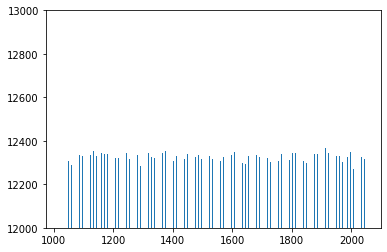

In [52]:
plt.bar(xts[1024:2048], ys_normalized[1024:2048], width=0.2)
plt.ylim((12000, 13000))

In [60]:
def ADC(numpy_array):
    numpy_array = numpy_array.astype('int64')
    for i in range(0, len(numpy_array)):
        #print(numpy_array[i])
        numpy_array[i] = bin(numpy_array[i]).replace('0b', '')
    return numpy_array

In [61]:
ys_bin = ADC(ys_normalized)

In [62]:
ys_bin.max()

101111001101000

In [63]:
ys_bin.min()

0

In [65]:
def lengthNormalizer(numpy_array):
    output_array = []
    for i in range(0, len(numpy_array)):
        output_array.append(format(numpy_array[i], '015d'))
    return output_array

In [72]:
# Converts array of normalized binary numbers into a long string
def binaryAdder(ys_length_normalized):
    result = ""
    for bit in ys_length_normalized:
        result += bit
    return result

In [70]:
ys_length_normalized = lengthNormalizer(ys_bin)

In [71]:
ys_length_normalized

['011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100101',
 '011000000100101',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100101',
 '011000000100100',
 '011000000100100',
 '011000000100101',
 '011000000100101',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100110',
 '011000000100101',
 '011000000100101',
 '011000000100110',
 '011000000100110',
 '011000000100111',
 '011000000100111',


In [73]:
ys_final = binaryAdder(ys_length_normalized)

In [75]:
print(ys_final[0:1024])

0110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001010110000001001010110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001010110000001001000110000001001000110000001001010110000001001010110000001001100110000001001100110000001001100110000001001100110000001001100110000001001100110000001001010110000001001010110000001001100110000001001100110000001001110110000001001110110000001001110110000001001110110000001001110110000001001110110000001001110110000001001110110000001001110110000001010000110000001010000110000001010000110000001010000110000001010000110000001010000110000001010000110000001001110110000001001110110000001